In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	0
float64		column 3	0
float64		column 4	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,146.000000,150.000000,150.000000,150.000000
mean,5.856849,3.054000,3.758667,1.198667
std,0.825616,0.433594,1.764420,0.763161
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

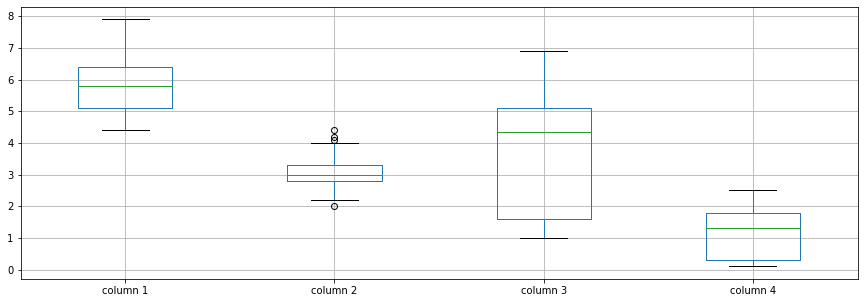

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.856849
column 2    3.054000
column 3    3.758667
column 4    1.198667
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.112915,0.869484,0.815097
column 2,-0.112915,1.000000,-0.420516,-0.356544
column 3,0.869484,-0.420516,1.000000,0.962757
column 4,0.815097,-0.356544,0.962757,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+65,4+65+65,4+65+65+65,4+65+65+65+65,4+65+65+65,4+65+65,4+65,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 14.347235573662651
Epoch: 1 , loss: 14.299802250332302
Epoch: 2 , loss: 14.364031261867947
Epoch: 3 , loss: 14.291609870062935
Epoch: 4 , loss: 14.338051478068033
Epoch: 5 , loss: 14.262463675604927
Epoch: 6 , loss: 14.281424946255154
Epoch: 7 , loss: 14.364188088311089
Epoch: 8 , loss: 14.391292677985298
Epoch: 9 , loss: 14.302744653489855
Epoch: 10 , loss: 14.24209870232476
Epoch: 11 , loss: 14.3772488700019
Epoch: 12 , loss: 14.2677337858412
Epoch: 13 , loss: 14.284777217441135
Epoch: 14 , loss: 14.313855912950304
Epoch: 15 , loss: 14.389312638176811
Epoch: 16 , loss: 14.268424457973904
Epoch: 17 , loss: 14.383567174275717
Epoch: 18 , loss: 14.319617801242405
Epoch: 19 , loss: 14.368419117397732
Epoch: 20 , loss: 14.250596470303005
Epoch: 21 , loss: 14.349878311157227
Epoch: 22 , loss: 14.19439803229438
Epoch: 23 , loss: 14.334538459777832
Epoch: 24 , loss: 14.35082976023356
Epoch: 25 , loss: 14.3381

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
145,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(10.778540163830527, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.11037539453105637

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
imputations[-1].to_excel("Iris_NL_1(imp).xlsx", index=False, header=False)